In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
bloons = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bloons TD data/BTD6_Rounds.csv')
bloons.head()

,Round,RBE,Red,Blue,Green,Camo_Green,Camo_Regen_Green,Yellow,Regen_Yellow,Camo_Yellow,...,MOAB,Fortified_MOAB,BFB,Fortified_BFB,ZOMG,Fortified_ZOMG,BAD,Fortified_BAD,DDT,Fortified_DDT
0,1,20,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,35,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,35,25,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,71,35,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,59,5,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


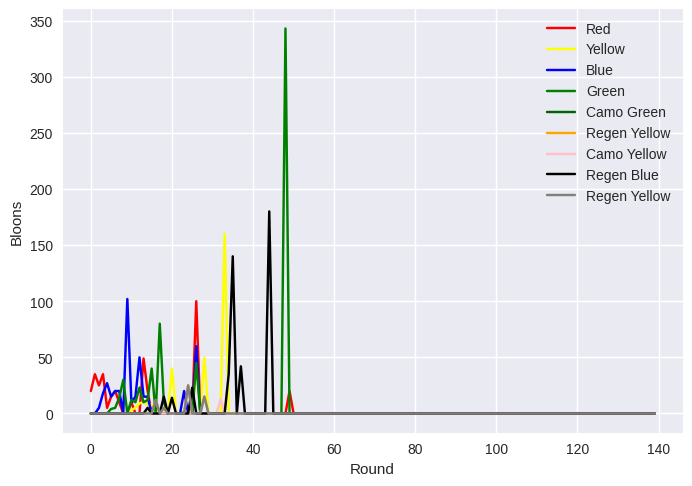

In [ ]:

red_bloons = bloons['Red']
yellow_bloons = bloons['Yellow']
blue_bloons = bloons['Blue']
green_bloons = bloons['Green']
camo_g_bloons = bloons['Camo_Green']
regen_y_bloons = bloons['Regen_Yellow']
camo_y_bloons = bloons['Camo_Yellow']
pink_bloons = bloons['Pink']
regen_yellow = bloons['Regen_Yellow']


plt.style.use('seaborn-v0_8')
plt.plot(red_bloons, c = 'red')
plt.plot(yellow_bloons, c = 'yellow')
plt.plot(blue_bloons, c = 'blue')
plt.plot(green_bloons, c = 'green')
plt.plot(camo_g_bloons, c = 'darkgreen')
plt.plot(regen_y_bloons, c = 'orange')
plt.plot(camo_y_bloons, c = 'pink')
plt.plot(pink_bloons, c = 'black')
plt.plot(regen_yellow, c = 'grey')
plt.legend(['Red', 'Yellow', 'Blue', 'Green', 'Camo Green', 'Regen Yellow', 'Camo Yellow', 'Regen Blue', 'Regen Yellow'])
plt.xlabel('Round')
plt.ylabel('Bloons')
plt.show()

This gives us an idea of the frequency of the bloons.

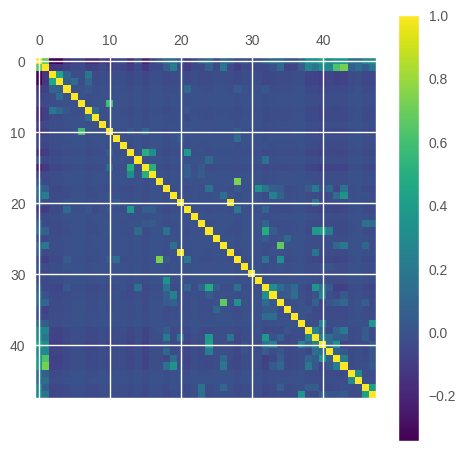

In [ ]:
plt.style.use('ggplot')
plt.matshow(bloons.corr(), cmap='viridis')
plt.colorbar()
plt.show()

Shows us how each bloon is correlated with eachother - some yellow dots appear on non-diagonal entries, which means that if we see one bloon that represents the row in a given round we are most likely going to see the bloon that represents the column in the given round (or vice versa).

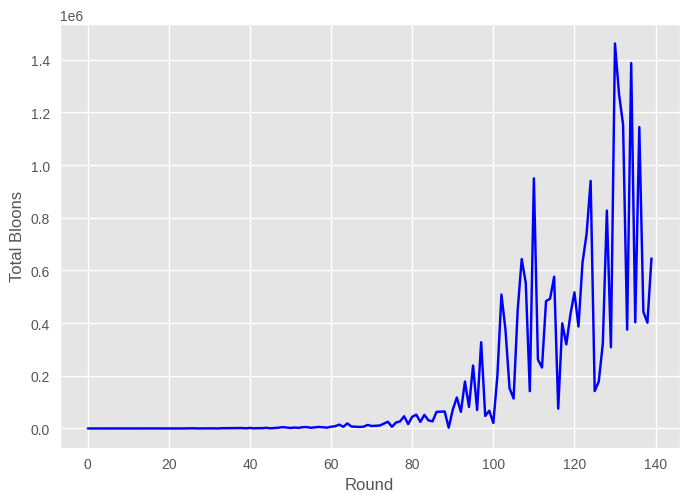

In [ ]:
bloons['Total_Bloons'] = bloons.sum(axis=1)

plt.plot(bloons['Total_Bloons'], c = 'blue')
plt.xlabel('Round')
plt.ylabel('Total Bloons')


plt.show()

Shows Total Bloon counts - seems to be going up but is quite noisy (because of the change from bloon rounds to MOAB rounds).

      Round         Bloon    Count
0         1           RBE       20
1         2           RBE       35
2         3           RBE       35
3         4           RBE       71
4         5           RBE       59
...     ...           ...      ...
6715    136  Total_Bloons   402904
6716    137  Total_Bloons  1144211
6717    138  Total_Bloons   443136
6718    139  Total_Bloons   401738
6719    140  Total_Bloons   645582

[6720 rows x 3 columns]
      Round         Bloon   Count
0         1           RBE      20
0         1           RBE      20
0         1           RBE      20
0         1           RBE      20
0         1           RBE      20
...     ...           ...     ...
6719    140  Total_Bloons  645582
6719    140  Total_Bloons  645582
6719    140  Total_Bloons  645582
6719    140  Total_Bloons  645582
6719    140  Total_Bloons  645582

[46201608 rows x 3 columns]


/tmp/ipython-input-7-485945753.py:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(data=bloons_expanded, x='Bloon', y='Round', scale='width', inner='quartile')


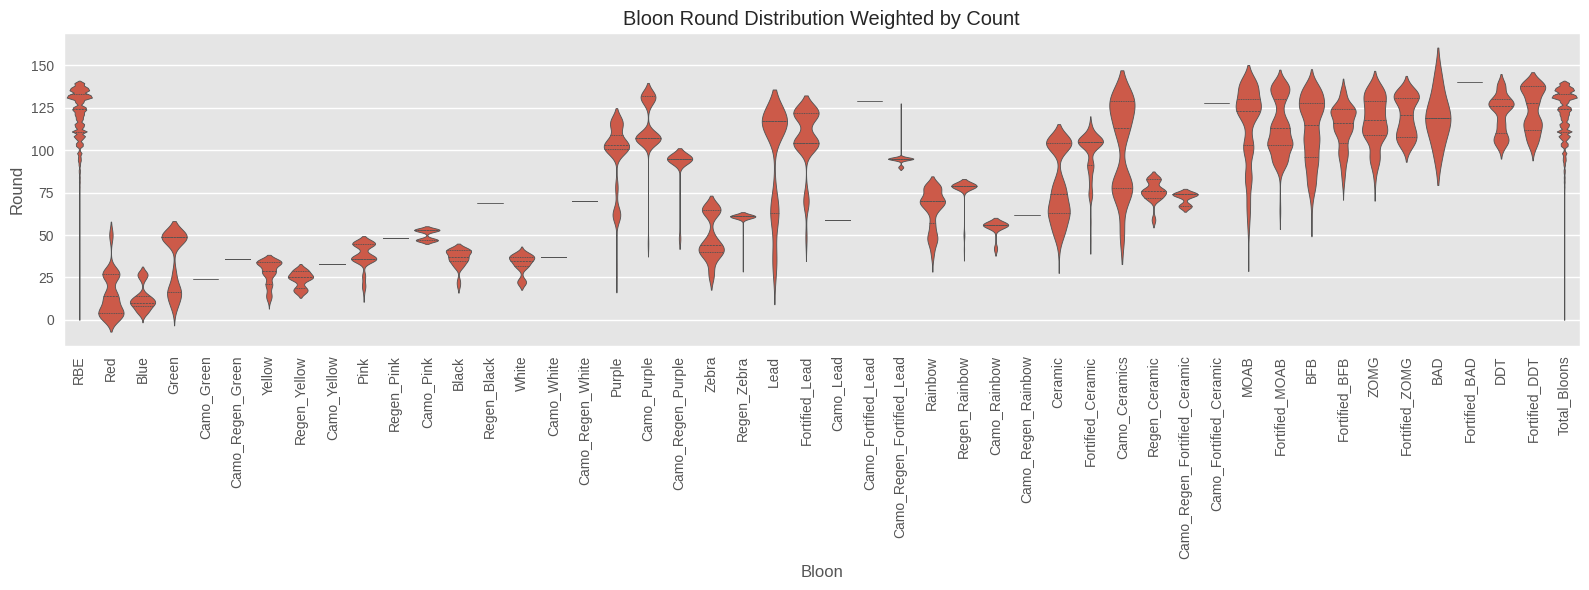

In [ ]:
column_names = bloons.columns.tolist()
column_names.remove('Round')
column_names.remove('Total_Bloons')

bloons_melted = pd.melt(
    bloons,
    id_vars='Round',
    var_name='Bloon',
    value_name='Count'
)

print(bloons_melted)

bloons_expanded = bloons_melted.loc[bloons_melted.index.repeat(bloons_melted['Count'])].copy()
print(bloons_expanded)

plt.figure(figsize=(16, 6))

sb.violinplot(data=bloons_expanded, x='Bloon', y='Round', scale='width', inner='quartile')

plt.xlabel('Bloon')
plt.ylabel('Round')
plt.xticks(rotation=90)
plt.title('Bloon Round Distribution Weighted by Count')
plt.tight_layout()
plt.show()

This expands our data set into copies of the same row, but the row is copied the amount of times that the bloon is seen in a round. So, for row 1 we have thaat the count is 20 - in our expanded dataset, we will see that same row 20 times. This makes us able to apply a violin plot to the data, as we have made a "weight" to the rows of the data. This violin plot now shows us the frequency of the bloon types for the rounds. There is probably better, more easily computable ways to do this that has better complexity.

In [ ]:
#Shows us a better idea of what is happening under the hood

bloons_melted = pd.melt(
    bloons,
    id_vars='Round',
    var_name='Bloon',
    value_name='Count'
)

print(bloons_melted)

print(bloons_melted['Count'])
print(bloons_melted.index.repeat(bloons_melted['Count']))


bloons_expanded = bloons_melted.loc[bloons_melted.index.repeat(bloons_melted['Count'])].copy()
print(bloons_expanded)

plt.figure(figsize=(16, 6))





      Round          Bloon  Count
0         1            RBE     20
1         2            RBE     35
2         3            RBE     35
3         4            RBE     71
4         5            RBE     59
...     ...            ...    ...
6575    136  Fortified_DDT      0
6576    137  Fortified_DDT      0
6577    138  Fortified_DDT     81
6578    139  Fortified_DDT      0
6579    140  Fortified_DDT      0

[6580 rows x 3 columns]
0       20
1       35
2       35
3       71
4       59
        ..
6575     0
6576     0
6577    81
6578     0
6579     0
Name: Count, Length: 6580, dtype: int64
Index([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       ...
       6577, 6577, 6577, 6577, 6577, 6577, 6577, 6577, 6577, 6577],
      dtype='int64', length=23095869)
      Round          Bloon  Count
0         1            RBE     20
0         1            RBE     20
0         1            RBE     20
0         1            RBE     20
0         1            RBE     20
...     ...       

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

From the line of code:

`bloons_expanded = bloons_melted.loc[bloons_melted.index.repeat(bloons_melted['Count'])].copy()`

We can look at what's happening from inner to outer.

`bloons_melted['Count']` simply gives us a vector of the counts of the bloon we see for a round.

`bloons_melted.index.repeat(bloons_melted['Count']` gives us a vector that repeats the index by the amount that count is in the row. This in turn creates a crazy long, 23095869 length vector.

Finally, `bloons_melted.loc[bloons_melted.index.repeat(bloons_melted['Count'])]` will give us a dataset that goes off of the index vector we created in the second inner function. So, in turn, the row with index 0 will repeat 20 times.

This gives us an insanely big dataset, but makes it so each combination of bloon type with round is weighted by the amount of times it is seen in the dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

bloons_scaled = StandardScaler().fit_transform(bloons)
labels = KMeans(n_clusters=3).fit_predict(bloons_scaled)

bloons['Cluster'] = labels

bloons

,Round,RBE,Red,Blue,Green,Camo_Green,Camo_Regen_Green,Yellow,Regen_Yellow,Camo_Yellow,...,Fortified_MOAB,BFB,Fortified_BFB,ZOMG,Fortified_ZOMG,BAD,Fortified_BAD,DDT,Fortified_DDT,Cluster
0,1,20,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,35,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,35,25,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,71,35,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,59,5,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,402648,0,0,0,0,0,0,0,0,...,96,24,0,0,0,0,0,0,0,0
136,137,1143984,0,0,0,0,0,0,0,0,...,0,24,0,18,0,0,0,0,0,0
137,138,442872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45,81,0
138,139,401346,0,0,0,0,0,0,0,0,...,72,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

bloons = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bloons TD data/BTD6_Rounds.csv')
bloons.head()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

bloons_s = StandardScaler().fit_transform(bloons)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(bloons_s)

print(pca.components_[0])
print(X_pca)

[ 0.4628193   0.4416224  -0.15967941 -0.16236111 -0.08068545 -0.04603495
 -0.05262584 -0.09924889 -0.07226776 -0.03355734 -0.08772269 -0.03024834
 -0.03714865 -0.13074622 -0.00762581 -0.14391145 -0.08092379 -0.03311952
  0.09759084  0.12504727  0.01323075 -0.10122864 -0.02248659  0.00119093
  0.13855252 -0.02277129  0.11820542  0.01329575 -0.05090562 -0.01131479
 -0.02828507 -0.00729013  0.0760117   0.07446552  0.09927312 -0.02438441
 -0.01437171  0.06441883  0.17080649  0.21476887  0.26618848  0.16514141
  0.27793457  0.28085129  0.02668634  0.040071    0.09330909  0.12481175]
[[-1.69326619e+00 -1.66522090e-01]
 [-1.90189065e+00 -2.17315391e-01]
 [-1.81397724e+00 -2.01450591e-01]
 [-2.13190948e+00 -2.80923266e-01]
 [-1.80676578e+00 -2.11731986e-01]
 [-1.78411320e+00 -2.02853178e-01]
 [-1.91895064e+00 -2.37278842e-01]
 [-1.78484947e+00 -2.02045163e-01]
 [-1.38844275e+00 -9.53431482e-02]
 [-2.72999238e+00 -4.58946623e-01]
 [-1.62454369e+00 -1.73760392e-01]
 [-1.54455629e+00 -1.61925233e

Next I decided to do a principle Component Analysis (PCA) on our data. PCA is useful because it scales down the dimensionality of the data while still doing a good job of finding the variation of the data. With PCA, we can represent a row of data in however many dimensions we want. PCA obviously isn't perfect - some of the variation in the data will be lossed in the process. However, it allows us to visualize the componentality of the data, as we do below.

Each row we see in `X_pca` is the scaling of the vector projection of our original datapoint to the vector that shows us the variation of the data the best.

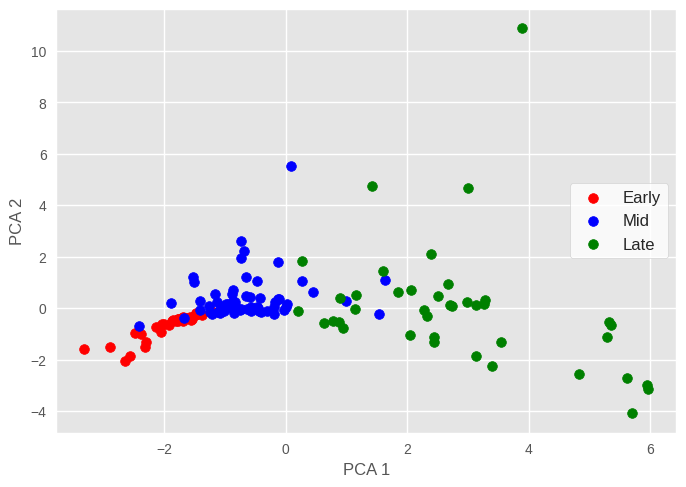

In [ ]:
X_pca_early = X_pca[:40]
X_pca_mid = X_pca[40:100]
X_pca_late = X_pca[100:]

plt.scatter(X_pca_early[:, 0], X_pca_early[:, 1], c='red', label='Early')
plt.scatter(X_pca_mid[:, 0], X_pca_mid[:, 1], c='blue', label='Mid')
plt.scatter(X_pca_late[:, 0], X_pca_late[:, 1], c='green', label='Late')
plt.legend(fontsize='large', loc='center right', frameon=True, facecolor='white')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()